In [1]:
import sys, os
sys.path.insert(0, '../core/')
import one_D_scattering as ods
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import cumtrapz as ct
from wave_pack import convolution_pad, convolution, convolution_scaling
from wave_pack import rect_pulse as pulse


In [20]:
def fret(om, g, G, d, alph):
    sigma = np.exp(2j*d+2j*om*d*alph) * G / (om + 0.5j*g)
    return -sigma / (om + 0.5j*g + G*sigma)

def decay(om, g, G, d, alph):
    sigma = np.exp(2j*d+2j*om*d*alph) * G / (om + 0.5j*g)
    return 1 / (om + 0.5j*g + G*sigma)

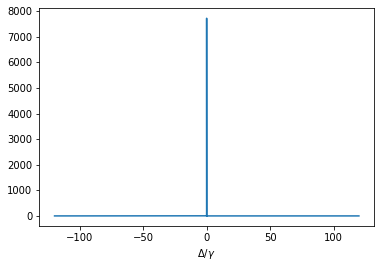

In [275]:
freqs = np.linspace(-120, 120, 100000)
nof = freqs.size
sp_values = fret(freqs, 1, 0.5,  3/6, 10)
dc_values = decay(freqs, 1, 0.5, 3/6, 10)
plt.plot(freqs, abs(sp_values)**2)
plt.xlabel(r'$\Delta / \gamma$')
plt.show()

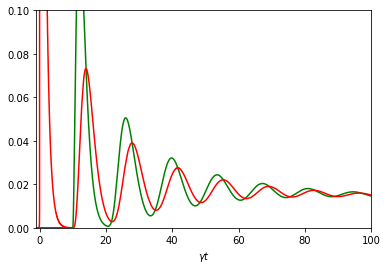

In [276]:

time_imp2, dct_values_imp2 = convolution(freqs, dc_values, np.ones_like(freqs))
time_imp2, temp_values_imp2 = convolution(freqs, sp_values, np.ones_like(freqs))
plt.plot(time_imp2, abs(temp_values_imp2)**2, 'g')
plt.plot(time_imp2, abs(dct_values_imp2)**2, 'r')

#plt.plot(time_imp, np.exp(time_imp)*np.heaviside(-time_imp, 0))
plt.xlim(-1,100)
plt.ylim(0,0.1)
plt.xlabel(r'$ \gamma t $')
plt.show()

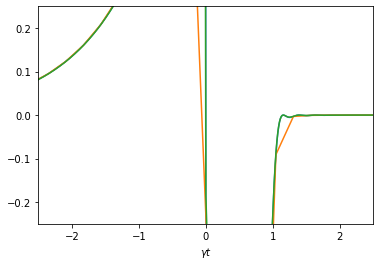

In [6]:

plt.plot(time_imp, np.exp(time_imp)*np.heaviside(-time_imp, 0) - abs(temp_values_imp)**2)
plt.plot(time, np.exp(time)*np.heaviside(-time, 0) - abs(temp_values)**2)
plt.plot(time_imp2, np.exp(time_imp2)*np.heaviside(-time_imp2, 0) - abs(temp_values_imp2)**2)

plt.xlim(-2.5,2.5)
plt.ylim(-0.25,0.25)
plt.xlabel(r'$ \gamma t $')
plt.show()

In [ ]:
time, temp_values = convolution(freqs, sp_values, np.ones_like(freqs))
plt.plot(time, abs(temp_values)**2)

from scipy.signal import medfilt
time_imp = time
temp_values_imp = medfilt(np.real(temp_values), 3) + 1j*medfilt(np.imag(temp_values), 3)
plt.plot(time_imp, abs(temp_values_imp)**2, 'r')

plt.plot(time_imp, np.exp(time_imp)*np.heaviside(-time_imp, 0))
#plt.yscale('log')
plt.xlim(-0.52,0)
plt.ylim(0.1,1.5)
plt.xlabel(r'$ \gamma t $')
plt.show()


In [ ]:
time, temp_values = convolution(freqs, sp_values, np.ones_like(freqs))

In [ ]:
plt.plot(freq_ext[_sf])

In [ ]:
freqs[0:nof//2]